In [5]:
# POPULATION ANALYSIS: linearity 

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns

#parameters
fRate = 1000/30.0
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysis_time = 1000.0 # in ms
analysis_time = int(np.ceil(analysis_time/fRate))
simulationDur_ms = 350.0 # in ms
simulationDur = int(np.ceil(simulationDur_ms/fRate))

#paths

savefigpath  = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

responsiveSensory, responsiveNoSensory = mfun.selectInterestedcells ( camKII= True, trained = False, plotValues = False )

# load data

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting.pkl'
dff_traceBoth, dff_traceVis, dff_traceOpto, dff_meanBoth1sec, dff_meanVis1sec, dff_meanOpto1sec   = pd.read_pickle(infoPath) 

In [6]:
print('Sensory responsive cell number:'+ str(np.sum(responsiveNoSensory)))

Sensory responsive cell number:2971


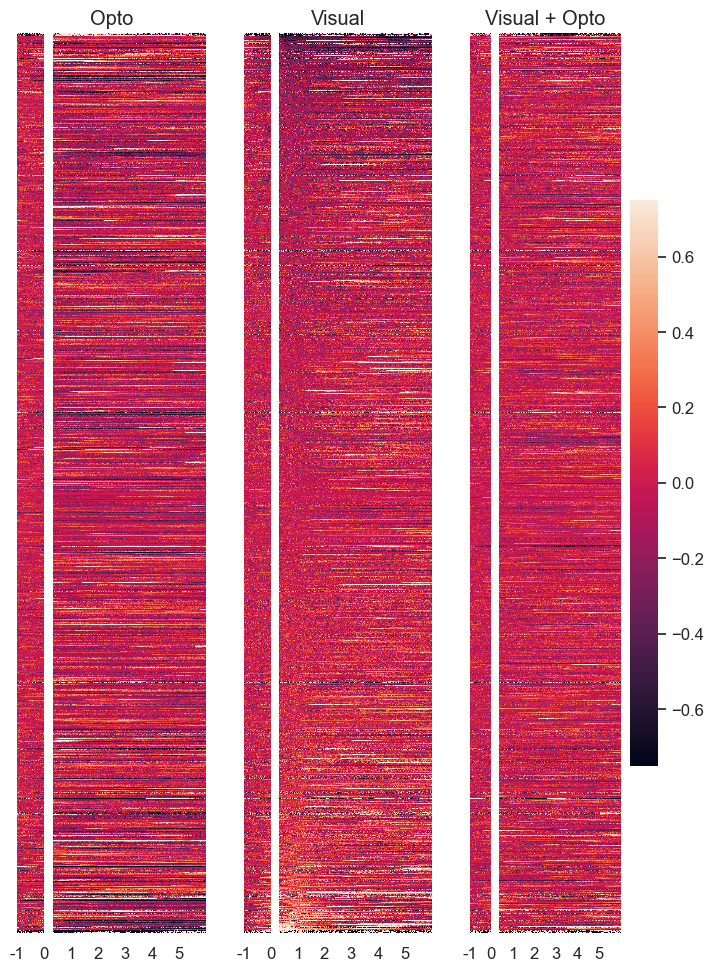

In [7]:
yminValue = -0.75
ymaxValue = 0.75

# HEAT PLOT FOR RESPONSIVE SENSORY CELLS
index = responsiveNoSensory
sortedInd = np.array(dff_meanVis1sec[index]).argsort()

plt.subplot(1,3,1)
plot_data = dff_traceOpto[index]
plot_data = plot_data[sortedInd]
x_labels = np.linspace(-2, 6, plot_data.shape[1], dtype = int)
step = 30
xticks = np.arange(0, len(x_labels), step)
xticklabels = x_labels[::step]
ax = sns.heatmap(plot_data, vmin = yminValue, vmax = ymaxValue, cbar = False, yticklabels = False)
plt.xticks (ticks = xticks, labels= xticklabels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plot_dataO = plot_data
plt.xlim(30,240)
plt.title('Opto')


plt.subplot(1,3,2)
plot_data = dff_traceVis[index]
plot_data = plot_data[sortedInd]
ax = sns.heatmap(plot_data, vmin = yminValue, vmax = ymaxValue, cbar = False, yticklabels = False)
plt.xticks (ticks = xticks, labels= xticklabels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plot_dataV = plot_data
plt.xlim(30,240)
plt.title('Visual')

plt.subplot(1,3,3)
plot_data = dff_traceBoth[index]
plot_data = plot_data[sortedInd]
plot_dataB = plot_data
ax = sns.heatmap(plot_data, vmin = yminValue, vmax = ymaxValue, cbar = True, yticklabels = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xticks (ticks = xticks, labels= xticklabels)
plot_diff = plot_data
plt.xlim(30,240)
plt.title('Visual + Opto')

pfun.save_figure( 'Figure5_Heat-map_SensoryResponsive-AllComparison',savefigpath)

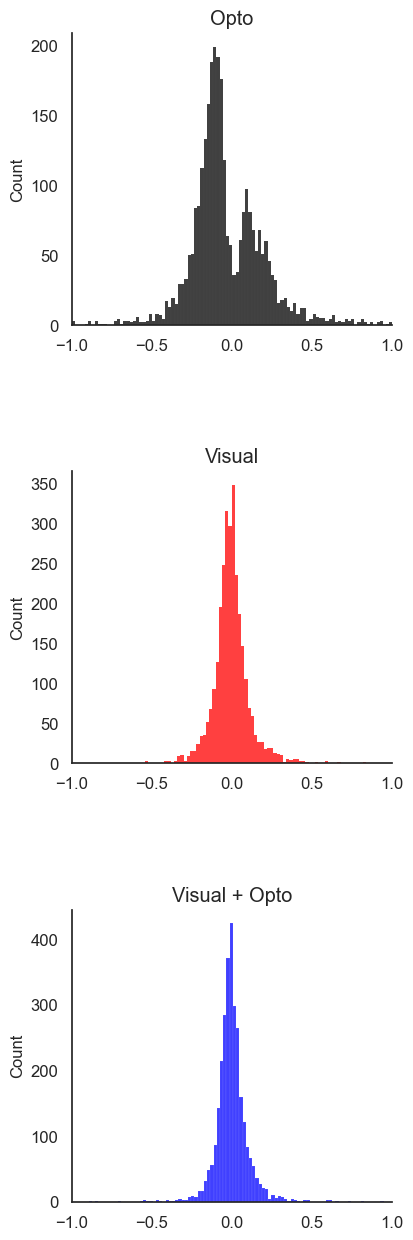

In [8]:
plot_dataVmean = np.nanmean(plot_dataV [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_dataBmean = np.nanmean(plot_dataB [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_dataOmean = np.nanmean(plot_dataO [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(8.27/2, 11.69))
plt.subplots_adjust(bottom = 1, top =2, hspace = 0.5, wspace = 0.4)
pfun.set_figure()
plt.subplot(3,1,1)
sns.histplot(plot_dataOmean, binwidth = 0.02, color = 'black')
plt.title('Opto')
plt.xlim(-1,1)
plt.subplot(3,1,2)
sns.histplot(plot_dataVmean, binwidth = 0.02, color = 'red',)
plt.title('Visual')
plt.xlim(-1,1)
plt.subplot(3,1,3)
sns.histplot(plot_dataBmean, binwidth = 0.02, color = 'blue')
plt.title('Visual + Opto')
plt.xlim(-1,1)

pfun.save_figure( 'Figure5_Histogram_AllComparison',savefigpath)

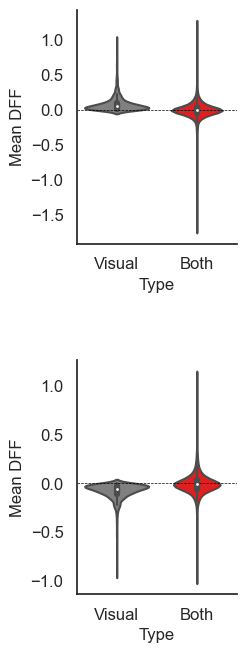

In [9]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(8.27/4, 11.69))
plt.subplots_adjust(bottom = 1, top =1.5, hspace = 0.5, wspace = 0.4)
colors = ['grey', 'red']
pfun.set_figure()

plot_dataVmean = np.nanmedian(plot_dataV [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_dataBmean = np.nanmedian(plot_dataB [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)

plt.subplot(2,1,1)
index = np.where((1>plot_dataVmean) &(plot_dataVmean>0))[0]
plot_data = pd.DataFrame( {'Mean DFF' :np.concatenate((plot_dataVmean[index], plot_dataBmean[index])), 
                              'Type':  np.concatenate((np.repeat('Visual', len(plot_dataVmean[index])), np.repeat('Both', len(plot_dataBmean[index]))))})
sns.violinplot(x = 'Type', y = 'Mean DFF', data = plot_data, palette=colors)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 0.5)

plt.subplot(2,1,2)
index = np.where((0>plot_dataVmean) &(plot_dataVmean>-1))[0]
plot_data= pd.DataFrame( {'Mean DFF' :np.concatenate((plot_dataVmean[index], plot_dataBmean[index])), 
                              'Type':  np.concatenate((np.repeat('Visual', len(plot_dataVmean[index])), np.repeat('Both', len(plot_dataBmean[index]))))})

sns.violinplot(x = 'Type', y = 'Mean DFF', data = plot_data, palette=colors)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 0.5)



pfun.save_figure( 'Figure5_Violin_SensoryResponsive-AllComparison',savefigpath)

C:\Users\Huriye\AppData\Local\Temp\ipykernel_18516\590495459.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot (y = 'Visual', x = 'Visual + Both', data = plot_data, palette=colors)
C:\Users\Huriye\AppData\Local\Temp\ipykernel_18516\590495459.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot (y = 'Visual', x = 'Visual + Both', data = plot_data, palette=colors)
C:\Users\Huriye\AppData\Local\Temp\ipykernel_18516\590495459.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot (y = 'Visual', x = 'Visual + Both', data = plot_data, palette=colors)


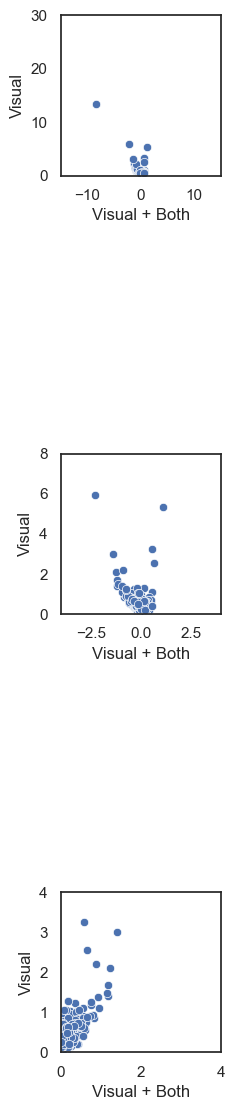

In [4]:
# If it was a higher magnitude of response, is it larger change? 

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(8.27/4, 11.69))
plt.subplots_adjust(bottom = 0.5, top =1.5, hspace = 0.5, wspace = 0.4)
colors = ['grey', 'red']
pfun.set_figure()

plot_dataVmean = np.nanmax(plot_dataV [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_dataBmean = np.nanmax(plot_dataB [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_diff = plot_dataBmean - plot_dataVmean
plot_dataVmean = np.nanmax(np.abs(plot_dataV [:, pre_frames:(pre_frames + simulationDur + analysis_time)]), axis = 1)
plot_data = pd.DataFrame( {'Visual' :plot_dataVmean, 
                           'Visual + Both':  plot_diff})

plt.subplot(3,1,1)
sns.scatterplot (y = 'Visual', x = 'Visual + Both', data = plot_data, palette=colors)
plt.ylim(0,30)
plt.xlim(-15,15)
axs[0].set_aspect('equal')

plt.subplot(3,1,2)
sns.scatterplot (y = 'Visual', x = 'Visual + Both', data = plot_data, palette=colors)
plt.ylim(0,8)
plt.xlim(-4,4)
axs[1].set_aspect('equal')

plt.subplot(3,1,3)
plot_dataVmean = np.nanmax(plot_dataV [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_dataBmean = np.nanmax(plot_dataB [:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis = 1)
plot_diff = np.abs(plot_dataBmean - plot_dataVmean)
plot_dataVmean = np.nanmax(np.abs(plot_dataV [:, pre_frames:(pre_frames + simulationDur + analysis_time)]), axis = 1)
plot_data = pd.DataFrame( {'Visual' :plot_dataVmean, 
                           'Visual + Both':  plot_diff})
sns.scatterplot (y = 'Visual', x = 'Visual + Both', data = plot_data, palette=colors)
plt.ylim(0,4)
plt.xlim(0,4)
axs[2].set_aspect('equal')




pfun.save_figure( 'Figure3_Correlation_SensoryResponsive-AllComparison',savefigpath)